In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Dense, LeakyReLU

In [4]:
dataset = np.load("dataset_8_01.npy")
short_dataset = np.load("short_dataset_8_01.npy")
combined_dataset = np.concatenate((dataset, short_dataset), axis=0)
print("Combined dataset shape:", combined_dataset.shape)

Combined dataset shape: (199780, 2, 128)


In [5]:
input_shape = (128,)
epochs = 100
batch_size = 1000

In [6]:
inputs = np.array(combined_dataset[:, 0])
outputs = np.array(combined_dataset[:, 1])

In [7]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.15, random_state=73)

In [8]:
inputs_train, inputs_val, outputs_train, outputs_val = train_test_split(inputs_train, outputs_train, test_size=0.1, random_state=73)

In [9]:
inputs_train = np.array(inputs_train)
outputs_train = np.array(outputs_train)
inputs_test = np.array(inputs_test)
outputs_test = np.array(outputs_test)
inputs_val = np.array(inputs_val)
outputs_val = np.array(outputs_val)

In [10]:
print(len(inputs_train))
print(len(inputs_test))
print(len(inputs_val))

152831
29967
16982


In [11]:
print(inputs_train[0])

[-0.82598887 -0.93942603 -0.94448998 -0.91705198 -0.8969339  -0.94256391
 -0.91702164 -0.69336565 -0.93533726 -0.8944864  -0.93078444 -0.96565758
 -0.91134191 -0.98747428 -0.95894074 -0.77594786 -0.93276164 -0.97480335
 -0.95106501 -0.90907206 -0.91858446 -0.9346192  -0.93825566 -0.92367781
 -0.86677554 -0.92928692 -0.96217082 -0.92136341 -0.91310185 -0.8037469
 -0.90611545 -0.90837794 -0.94359606 -0.94370285 -0.92364745 -0.84679408
 -0.94290474 -0.99770813 -0.7983572  -0.91057089 -0.91888823 -0.96923143
 -0.96323181 -0.99116437 -0.91971945 -0.91744649 -0.93489467 -0.98121624
 -0.77127094 -0.91739369 -0.94612634 -0.92139394 -0.97076403 -0.96184236
 -0.86517116 -0.91993101 -0.81880909 -0.90293416 -0.8824458  -0.95338406
 -0.87545975 -0.93666739 -0.99578085 -0.92282905  0.56368643  0.3427517
  0.32854022  0.39876768  0.44216466  0.33402586  0.39883745  0.72058592
  0.35375729  0.44709517  0.36556849  0.25981807  0.41165025  0.15778007
  0.28360651  0.63079704  0.36049371  0.22306595  0.3

In [12]:
def autoencoder_dense_1(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    # Encoder
    model.add(Dense(64, activation='tanh'))
    # Decoder
    model.add(Dense(128, activation='linear'))
    return model

def autoencoder_dense_2(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    # Encoder
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    # Decoder
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(128, activation='linear'))
    return model

def autoencoder_dense_3(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    # Encoder
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(16, activation='tanh'))
    # Decoder
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(128, activation='linear'))
    return model

In [13]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [14]:
dense_1 = autoencoder_dense_1(input_shape)
dense_1.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

In [15]:
history_d1 = dense_1.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False,
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0167 - loss: 0.2151 - val_accuracy: 0.0371 - val_loss: 0.0396 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0403 - loss: 0.0353 - val_accuracy: 0.0572 - val_loss: 0.0271 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0610 - loss: 0.0255 - val_accuracy: 0.0765 - val_loss: 0.0221 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0792 - loss: 0.0213 - val_accuracy: 0.0955 - val_loss: 0.0192 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0976 - loss: 0.0186 - val_accuracy: 0.1129 - val_loss: 0.0170 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1156 - loss: 0.0165 - val_accuracy: 0.1288 - val_loss: 0.0153 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1315 - loss: 0

Epoch 87/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2176 - loss: 0.0081 - val_accuracy: 0.2177 - val_loss: 0.0081 - learning_rate: 1.0000e-06
Epoch 88/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2175 - loss: 0.0081 - val_accuracy: 0.2177 - val_loss: 0.0081 - learning_rate: 1.0000e-06
Epoch 89/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2175 - loss: 0.0081 - val_accuracy: 0.2177 - val_loss: 0.0081 - learning_rate: 1.0000e-06
Epoch 90/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2175 - loss: 0.0081 - val_accuracy: 0.2177 - val_loss: 0.0081 - learning_rate: 1.0000e-06
Epoch 91/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2175 - loss: 0.0081 - val_accuracy: 0.2177 - val_loss: 0.0081 - learning_rate: 1.0000e-06
Epoch 92/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2175 - loss: 0.0081 - val_accuracy: 0.2177 - val_loss: 0.0081 - learning_rate: 1.0000e-06
Epoch 93/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

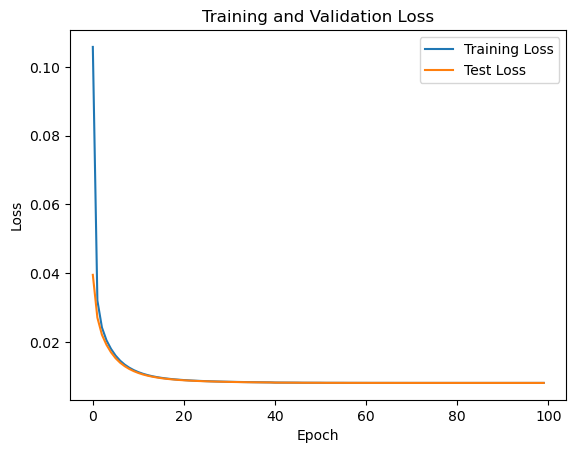

In [16]:
plt.plot(history_d1.history['loss'], label='Training Loss')
plt.plot(history_d1.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

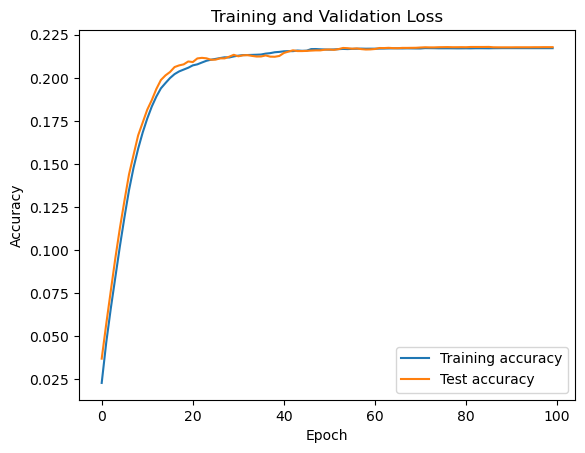

In [17]:
plt.plot(history_d1.history['accuracy'], label='Training accuracy')
plt.plot(history_d1.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [18]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [19]:
dense_2 = autoencoder_dense_2(input_shape)
dense_2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

In [20]:
history_d2 = dense_2.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False, 
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0156 - loss: 0.1988 - val_accuracy: 0.0392 - val_loss: 0.0394 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0405 - loss: 0.0354 - val_accuracy: 0.0530 - val_loss: 0.0282 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0537 - loss: 0.0268 - val_accuracy: 0.0631 - val_loss: 0.0239 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0650 - loss: 0.0232 - val_accuracy: 0.0735 - val_loss: 0.0217 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0750 - loss: 0.0212 - val_accuracy: 0.0837 - val_loss: 0.0201 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0849 - loss: 0.0196 - val_accuracy: 0.0919 - val_loss: 0.0187 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0938 - loss: 0.

Epoch 87/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1334 - loss: 0.0125 - val_accuracy: 0.1348 - val_loss: 0.0125 - learning_rate: 1.0000e-06
Epoch 88/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1334 - loss: 0.0125 - val_accuracy: 0.1348 - val_loss: 0.0125 - learning_rate: 1.0000e-06
Epoch 89/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1334 - loss: 0.0125 - val_accuracy: 0.1348 - val_loss: 0.0125 - learning_rate: 1.0000e-06
Epoch 90/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1334 - loss: 0.0125 - val_accuracy: 0.1348 - val_loss: 0.0125 - learning_rate: 1.0000e-06
Epoch 91/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1334 - loss: 0.0125 - val_accuracy: 0.1348 - val_loss: 0.0125 - learning_rate: 1.0000e-06
Epoch 92/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1334 - loss: 0.0125 - val_accuracy: 0.1347 - val_loss: 0.0125 - learning_rate: 1.0000e-06
Epoch 93/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

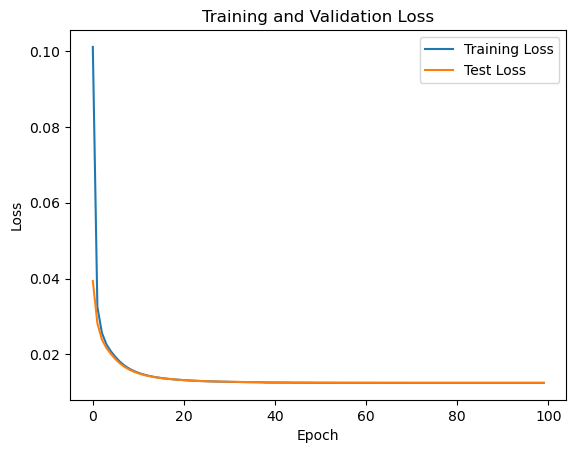

In [21]:
plt.plot(history_d2.history['loss'], label='Training Loss')
plt.plot(history_d2.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

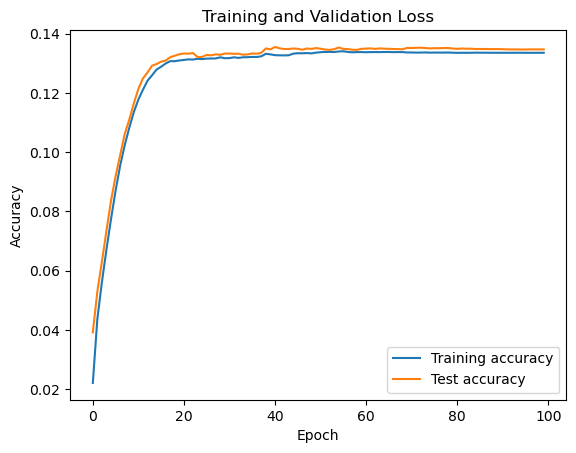

In [22]:
plt.plot(history_d2.history['accuracy'], label='Training accuracy')
plt.plot(history_d2.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [23]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [24]:
dense_3 = autoencoder_dense_3(input_shape)
dense_3.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

In [25]:
history_d3 = dense_3.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False, 
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0157 - loss: 0.2251 - val_accuracy: 0.0301 - val_loss: 0.0452 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0362 - loss: 0.0405 - val_accuracy: 0.0443 - val_loss: 0.0316 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0469 - loss: 0.0299 - val_accuracy: 0.0482 - val_loss: 0.0271 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0514 - loss: 0.0264 - val_accuracy: 0.0510 - val_loss: 0.0248 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0550 - loss: 0.0241 - val_accuracy: 0.0599 - val_loss: 0.0227 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0616 - loss: 0.0223 - val_accuracy: 0.0658 - val_loss: 0.0216 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0689 - loss: 0

Epoch 87/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0909 - loss: 0.0171 - val_accuracy: 0.0900 - val_loss: 0.0172 - learning_rate: 1.0000e-06
Epoch 88/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0909 - loss: 0.0171 - val_accuracy: 0.0900 - val_loss: 0.0172 - learning_rate: 1.0000e-06
Epoch 89/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0909 - loss: 0.0171 - val_accuracy: 0.0900 - val_loss: 0.0172 - learning_rate: 1.0000e-06
Epoch 90/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0909 - loss: 0.0171 - val_accuracy: 0.0900 - val_loss: 0.0172 - learning_rate: 1.0000e-06
Epoch 91/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0909 - loss: 0.0171 - val_accuracy: 0.0900 - val_loss: 0.0172 - learning_rate: 1.0000e-06
Epoch 92/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0909 - loss: 0.0171 - val_accuracy: 0.0900 - val_loss: 0.0172 - learning_rate: 1.0000e-06
Epoch 93/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

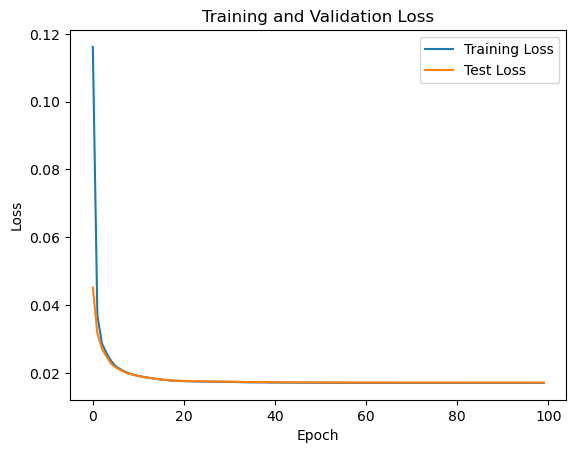

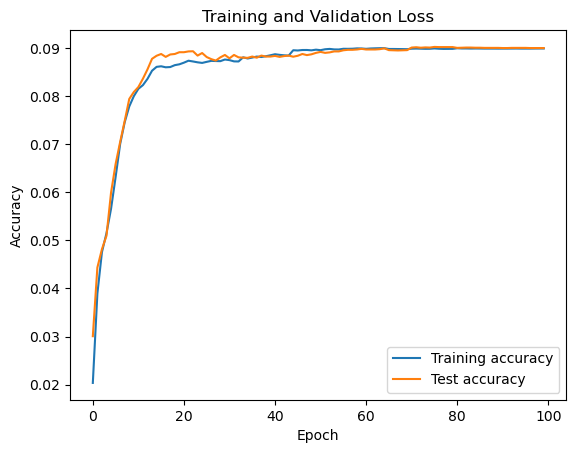

In [26]:
plt.plot(history_d3.history['loss'], label='Training Loss')
plt.plot(history_d3.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history_d3.history['accuracy'], label='Training accuracy')
plt.plot(history_d3.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [27]:
def calculate_angles(sin_cos_conf, L):
    angles_conf = tf.atan2(sin_cos_conf[:, :L*L], sin_cos_conf[:, L*L:], )
    return angles_conf

def periodic_index(value, max_value):
    return tf.math.mod(value, max_value)


def periodic_diff(angle1, angle2):
    diff = angle1 - angle2
    diff = tf.where(diff > np.pi, diff - 2 * np.pi, diff)
    diff = tf.where(diff < -np.pi, diff + 2 * np.pi, diff)
    return diff

@tf.function
def calculate_single_lattice_energy(angles, L, J):
    # shape of the input data: number of elements in the batch, L, L
    angles = tf.reshape(angles, (L, L))

    indices = tf.range(L)
    grid_x, grid_y = tf.meshgrid(indices, indices)
    
    cell_indices = tf.stack([grid_x, grid_y], axis=-1)
    cell_indices = tf.reshape(cell_indices, (-1, 2))


    def energy_per_cell(index):
        # indices in this iteration
        i = index[0]
        j = index[1]

        neighbors = [
            angles[periodic_index(i + 1, L), j], # down
            angles[periodic_index(i - 1, L), j], # up
            angles[i, periodic_index(j + 1, L)], # right
            angles[i, periodic_index(j - 1, L)]  # left
        ]

        local_energy = tf.reduce_sum(-J * tf.math.cos(periodic_diff(angles[i, j], neighbors)))
        return local_energy


    energy_contributions = tf.vectorized_map(
            energy_per_cell,
            cell_indices
    )
    total_energy = tf.reduce_sum(energy_contributions) 

    return total_energy / 2

@tf.function
def calculate_energy(angles_batch, L, J):
    energies = tf.vectorized_map(
        lambda angles: calculate_single_lattice_energy(angles, L, J),
        angles_batch
    )
    return energies

In [28]:
@tf.function
def energy_difference(y_true, y_pred):
#     tf.config.run_functions_eagerly(False)
    L = 8
    J = 1
 
    y_true_angles = calculate_angles(y_true, L)
    y_pred_angles = calculate_angles(y_pred, L)
    
    true_energies = calculate_energy(y_true_angles, L, J)
    pred_energies = calculate_energy(y_pred_angles, L, J)
    
    energy_diff = tf.abs(true_energies - pred_energies)
    mean_energy_diff = tf.reduce_mean(energy_diff)
    
    return mean_energy_diff

In [29]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [30]:
dense_1_ed = autoencoder_dense_1(input_shape)
dense_1_ed.compile(optimizer=optimizer, loss=energy_difference, metrics=['accuracy'])

In [31]:
history_d1_ed = dense_1_ed.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False,
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 31s 110ms/step - accuracy: 0.0110 - loss: 49.6078 - val_accuracy: 0.0110 - val_loss: 1.4588 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.0102 - loss: 1.3205 - val_accuracy: 0.0110 - val_loss: 1.0610 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.0101 - loss: 1.0040 - val_accuracy: 0.0116 - val_loss: 0.8947 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.0105 - loss: 0.8564 - val_accuracy: 0.0113 - val_loss: 0.8072 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.0103 - loss: 0.7685 - val_accuracy: 0.0111 - val_loss: 0.7475 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.0099 - loss: 0.7107 - val_accuracy: 0.0109 - val_loss: 0.7136 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy

153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.0127 - loss: 0.4143 - val_accuracy: 0.0124 - val_loss: 0.4876 - learning_rate: 0.0010
Epoch 45/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.0126 - loss: 0.4103 - val_accuracy: 0.0135 - val_loss: 0.4823 - learning_rate: 0.0010
Epoch 46/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.0134 - loss: 0.4103 - val_accuracy: 0.0139 - val_loss: 0.4859 - learning_rate: 0.0010
Epoch 47/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.0133 - loss: 0.4073 - val_accuracy: 0.0138 - val_loss: 0.4864 - learning_rate: 0.0010
Epoch 48/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.0132 - loss: 0.4070 - val_accuracy: 0.0132 - val_loss: 0.4888 - learning_rate: 0.0010
Epoch 49/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.0127 - loss: 0.4065 - val_accuracy: 0.0134 - val_loss: 0.4843 - learning_rate: 0.0010
Epoch 50/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.0129

Epoch 87/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.0127 - loss: 0.3490 - val_accuracy: 0.0135 - val_loss: 0.4452 - learning_rate: 5.0000e-04
Epoch 88/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.0126 - loss: 0.3481 - val_accuracy: 0.0139 - val_loss: 0.4460 - learning_rate: 5.0000e-04
Epoch 89/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.0126 - loss: 0.3478 - val_accuracy: 0.0136 - val_loss: 0.4492 - learning_rate: 5.0000e-04
Epoch 90/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.0126 - loss: 0.3481 - val_accuracy: 0.0136 - val_loss: 0.4469 - learning_rate: 5.0000e-04
Epoch 91/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.0125 - loss: 0.3470 - val_accuracy: 0.0136 - val_loss: 0.4434 - learning_rate: 5.0000e-04
Epoch 92/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.0127 - loss: 0.3463 - val_accuracy: 0.0138 - val_loss: 0.4460 - learning_rate: 5.0000e-04
Epoch 93/100
153/153 ━━━━━━━━━━━━━

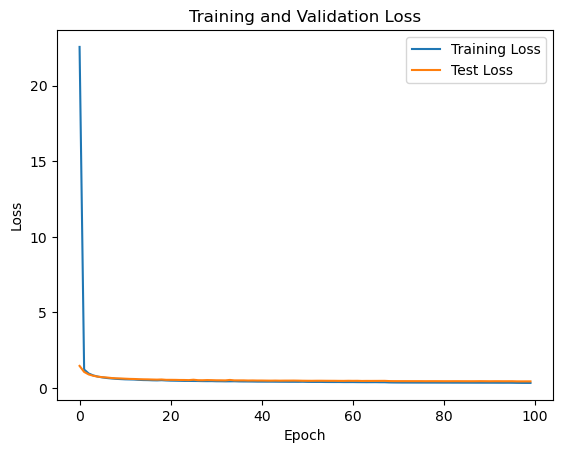

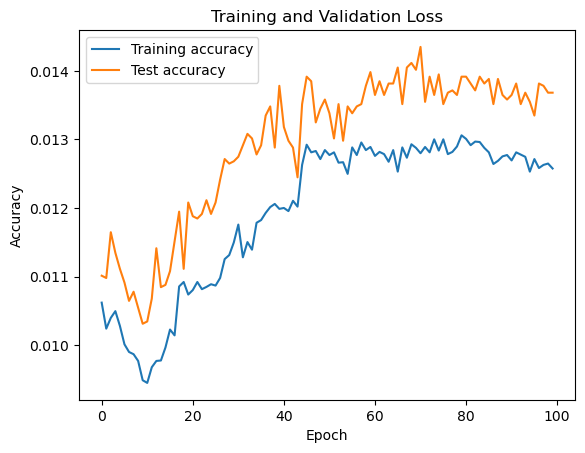

In [32]:
plt.plot(history_d1_ed.history['loss'], label='Training Loss')
plt.plot(history_d1_ed.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history_d1_ed.history['accuracy'], label='Training accuracy')
plt.plot(history_d1_ed.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [33]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [34]:
dense_2_ed = autoencoder_dense_2(input_shape)
dense_2_ed.compile(optimizer=optimizer, loss=energy_difference, metrics=['accuracy'])

In [35]:
history_d2_ed = dense_2_ed.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False,
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 118ms/step - accuracy: 0.0070 - loss: 42.9387 - val_accuracy: 0.0053 - val_loss: 1.8510 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.0052 - loss: 1.5479 - val_accuracy: 0.0072 - val_loss: 1.0373 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.0062 - loss: 0.9955 - val_accuracy: 0.0065 - val_loss: 0.8975 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.0059 - loss: 0.8706 - val_accuracy: 0.0070 - val_loss: 0.8401 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.0067 - loss: 0.8008 - val_accuracy: 0.0071 - val_loss: 0.7745 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.0068 - loss: 0.7461 - val_accuracy: 0.0069 - val_loss: 0.7797 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accur

Epoch 44/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.0099 - loss: 0.4469 - val_accuracy: 0.0098 - val_loss: 0.5016 - learning_rate: 0.0010
Epoch 45/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.0099 - loss: 0.4457 - val_accuracy: 0.0099 - val_loss: 0.5051 - learning_rate: 0.0010
Epoch 46/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.0099 - loss: 0.4445 - val_accuracy: 0.0102 - val_loss: 0.5033 - learning_rate: 0.0010
Epoch 47/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.0103 - loss: 0.4406 - val_accuracy: 0.0097 - val_loss: 0.5076 - learning_rate: 0.0010
Epoch 48/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.0102 - loss: 0.4412 - val_accuracy: 0.0095 - val_loss: 0.5081 - learning_rate: 0.0010
Epoch 49/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.0102 - loss: 0.4429 - val_accuracy: 0.0093 - val_loss: 0.5112 - learning_rate: 0.0010
Epoch 50/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step -

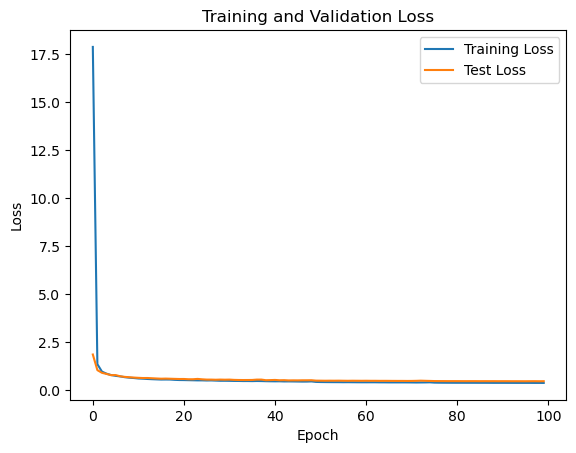

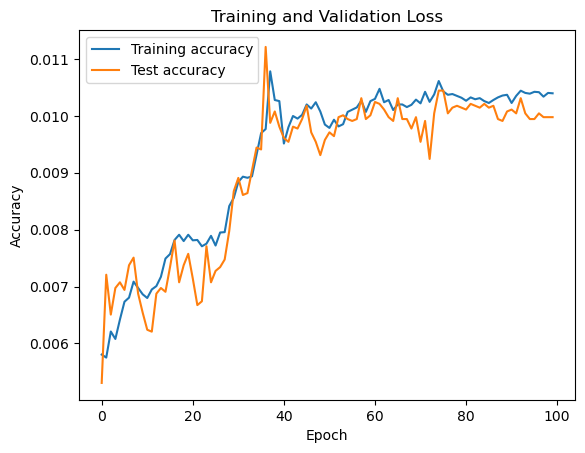

In [36]:
plt.plot(history_d2_ed.history['loss'], label='Training Loss')
plt.plot(history_d2_ed.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history_d2_ed.history['accuracy'], label='Training accuracy')
plt.plot(history_d2_ed.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [37]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [38]:
dense_3_ed = autoencoder_dense_3(input_shape)
dense_3_ed.compile(optimizer=optimizer, loss=energy_difference, metrics=['accuracy'])

In [39]:
history_d3_ed = dense_3_ed.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False,
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 117ms/step - accuracy: 0.0066 - loss: 45.5325 - val_accuracy: 0.0014 - val_loss: 3.7991 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.0011 - loss: 3.3890 - val_accuracy: 0.0038 - val_loss: 2.0502 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.0028 - loss: 1.9231 - val_accuracy: 0.0016 - val_loss: 1.6931 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.0014 - loss: 1.6490 - val_accuracy: 4.3381e-04 - val_loss: 1.5912 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.0012 - loss: 1.4929 - val_accuracy: 0.0031 - val_loss: 1.3893 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.0033 - loss: 1.2506 - val_accuracy: 0.0030 - val_loss: 1.1258 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - a

153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.0045 - loss: 0.4414 - val_accuracy: 0.0045 - val_loss: 0.5106 - learning_rate: 2.5000e-04
Epoch 86/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.0046 - loss: 0.4407 - val_accuracy: 0.0044 - val_loss: 0.5079 - learning_rate: 2.5000e-04
Epoch 87/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.0045 - loss: 0.4423 - val_accuracy: 0.0045 - val_loss: 0.5091 - learning_rate: 2.5000e-04
Epoch 88/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.0045 - loss: 0.4415 - val_accuracy: 0.0045 - val_loss: 0.5137 - learning_rate: 2.5000e-04
Epoch 89/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.0045 - loss: 0.4389 - val_accuracy: 0.0046 - val_loss: 0.5076 - learning_rate: 2.5000e-04
Epoch 90/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.0044 - loss: 0.4379 - val_accuracy: 0.0045 - val_loss: 0.5142 - learning_rate: 2.5000e-04
Epoch 91/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/st

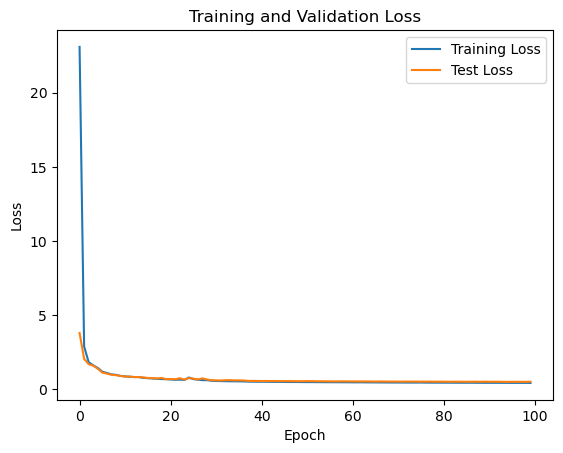

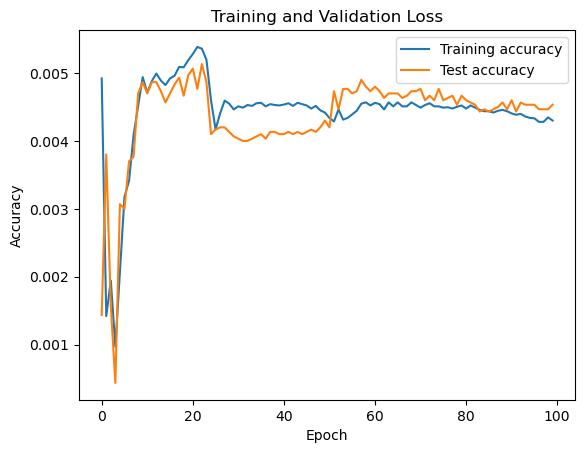

In [40]:
plt.plot(history_d3_ed.history['loss'], label='Training Loss')
plt.plot(history_d3_ed.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history_d3_ed.history['accuracy'], label='Training accuracy')
plt.plot(history_d3_ed.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [41]:
histories = [history_d1, history_d2, history_d3]
histories_ed = [history_d1_ed, history_d2_ed, history_d3_ed]
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "lime", "cyan"]
names = ["dense_1", "dense_2", "dense_3", "dense_1_custom_loss", "dense_2_custom_loss", "dense_3_custom_loss"]

In [42]:
import matplotlib.pyplot as plt

def plot_training_histories(histories, colors, names, skip=0):
    """Plots training and validation loss curves for multiple models.

    Args:
        histories (list): List of Keras History objects.
        colors (list): List of colors for each model's line.
        names (list): List of names for each model.
    """

    plt.figure(figsize=(12, 4))

    for history, color, name in zip(histories, colors, names):
        # Extract training and validation loss from history
        train_loss = history.history['loss'][skip:]
        val_loss = history.history['val_loss'][skip:]
        epochs = range(1, len(train_loss) + 1)

        # Plot training loss (solid line)
        plt.plot(epochs, train_loss, color=color, label=f'{name} (train)', linestyle='-')

        # Plot validation loss (dashed line)
        plt.plot(epochs, val_loss, color=color, label=f'{name} (val)', linestyle='--')

    # Add labels, title, and legend
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()


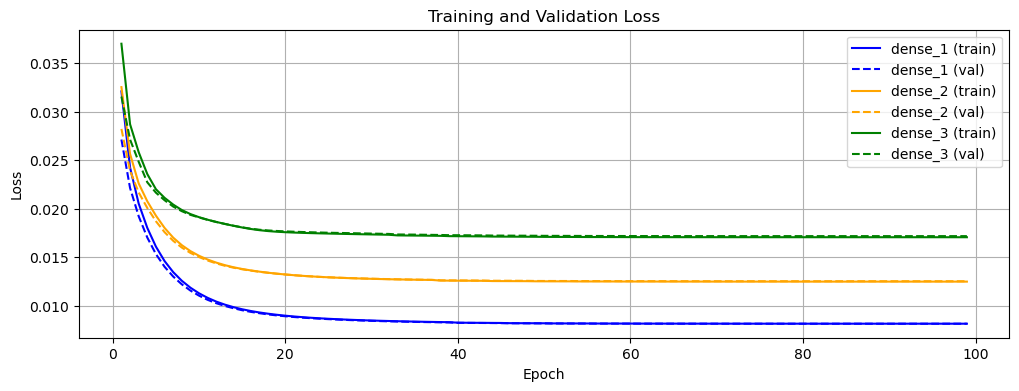

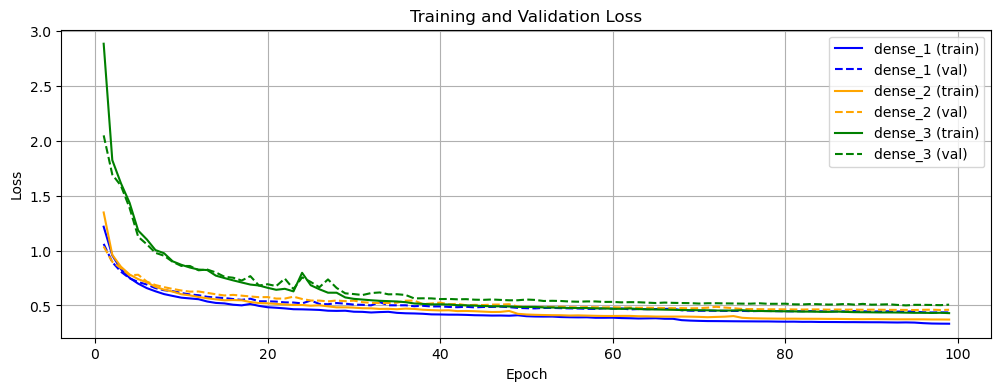

In [43]:
# ... (Your code to train multiple models, storing histories in the 'histories' list)
plot_training_histories(histories, colors, names, skip=1)
plot_training_histories(histories_ed, colors, names, skip=1)


In [44]:
models = [dense_1, dense_2, dense_3, dense_1_ed, dense_2_ed, dense_3_ed]
model_histories = [history_d1, history_d2, history_d3, history_d1_ed, history_d2_ed, history_d3_ed]
names_models = ["dense_1_8_01_tanh_linear", "dense_2_8_01_tanh_linear", "dense_3_8_01_tanh_linear", "dense_1_custom_loss_8_01_tanh_linear", "dense_2_custom_loss_8_01_tanh_linear", "dense_3_custom_loss_8_01_tanh_linear"]

In [45]:
import pickle

for i, model in enumerate(models):
    model.save(f"C:/Users/hmpor/Jupyter Notebooks/Thesis/Model training/Models/TL_bonus/{names_models[i]}.h5")
    model.save(f"C:/Users/hmpor/Jupyter Notebooks/Thesis/Model training/Models/TL_bonus/{names_models[i]}.keras")

    
    with open(f"C:/Users/hmpor/Jupyter Notebooks/Thesis/Model training/Models/TL_bonus/{names_models[i]}.pkl", "wb") as pickle_file:
        pickle.dump(model_histories[i].history, pickle_file)
    # Save the entire model to a HDF5 file
#     autoencoder_energy_2.save('C:/Users/hmpor/Jupyter Notebooks/Thesis/trained_models/autoencoder_multiple_simulations_model.h5')
#     autoencoder_energy_2.save('C:/Users/hmpor/Jupyter Notebooks/Thesis/trained_models/autoencoder_multiple_simulations_model.keras')


In [46]:
names_models = ["dense_1_8_01_tanh_linear", "dense_2_8_01_tanh_linear", "dense_3_8_01_tanh_linear", "dense_1_custom_loss_8_01_tanh_linear", "dense_2_custom_loss_8_01_tanh_linear", "dense_3_custom_loss_8_01_tanh_linear"]

In [47]:
import pickle

# names_models = ["dense_1_8_01_leakyrelu_tanh", "dense_2_8_01_leakyrelu_tanh", "dense_3_8_01_leakyrelu_tanh", "dense_1_custom_loss_8_01_leakyrelu_tanh", "dense_2_custom_loss_8_01_leakyrelu_tanh", "dense_3_custom_loss_8_01_leakyrelu_tanh"]

histories = []

for i, _ in enumerate(names_models):    
    with open(f"C:/Users/hmpor/Jupyter Notebooks/Thesis/Model training/Models/TL_bonus/{names_models[i]}.pkl", 'rb') as pickle_file:
        history = pickle.load(pickle_file)
    
    histories.append(history)


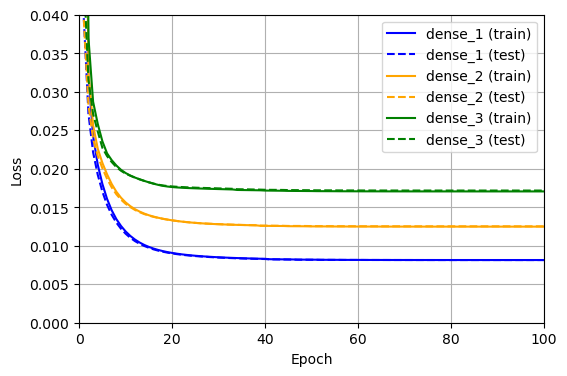

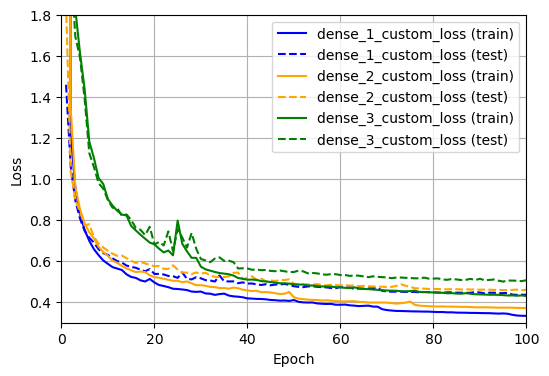

531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0.007916482864296491, 0.012143758396221423, 0.016534472476025325, 1.6186223842314944, 1.6125670126712452, 1.7784617360864794]
[<tf.Tensor: shape=(), dtype=float64, numpy=2.0373770352570135>, <tf.Tensor: shape=(), dtype=float64, numpy=2.811869300656949>, <tf.Tensor: shape=(), dtype=float64, numpy=3.2641196675327966>, <tf.Tensor: shape=(), dtype=float64, numpy=0.4150075486699118>, <tf.Tensor: shape=(), dtype=float64, numpy=0.4434346999517914>, <tf.Tensor: shape=(), dtype=float64, numpy=0.4892448815432566>]


In [49]:
names = ["dense_1", "dense_2", "dense_3", "dense_1_custom_loss", "dense_2_custom_loss", "dense_3_custom_loss"]
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "lime", "cyan"]

import matplotlib.pyplot as plt

def plot_training_histories(histories, colors, names, ylim, skip=0, title="plot.png"):
    """Plots training and validation loss curves for multiple models.

    Args:
        histories (list): List of Keras History objects.
        colors (list): List of colors for each model's line.
        names (list): List of names for each model.
    """

    plt.figure(figsize=(6, 4))

    for history, color, name in zip(histories, colors, names):
        # Extract training and validation loss from history
        train_loss = history['loss'][skip:]
        val_loss = history['val_loss'][skip:]
        epochs = range(1, len(train_loss) + 1)

        # Plot training loss (solid line)
        plt.plot(epochs, train_loss, color=color, label=f'{name} (train)', linestyle='-')

        # Plot validation loss (dashed line)
        plt.plot(epochs, val_loss, color=color, label=f'{name} (test)', linestyle='--')

    # Add labels, title, and legend
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xlim(0, 100)
    if ylim != (0, 0):
        plt.ylim(ylim)
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.savefig(title, bbox_inches='tight')
    plt.show()

plot_training_histories(histories[:3], colors, names[:3], (0.0, 0.04), skip=0, title="mse_TL.png")
plot_training_histories(histories[3:], colors, names[3:], (0.3, 1.8), skip=0, title="ED_TL.png")

from tensorflow.keras.models import load_model

models = []
# names_models = ["dense_1_8_01_leakyrelu_tanh", "dense_2_8_01_leakyrelu_tanh", "dense_3_8_01_leakyrelu_tanh", "dense_1_custom_loss_8_01_leakyrelu_tanh", "dense_2_custom_loss_8_01_leakyrelu_tanh", "dense_3_custom_loss_8_01_leakyrelu_tanh"]
base_path = "C:/Users/hmpor/Jupyter Notebooks/Thesis/Model training/Models/TL_bonus/"
paths = []

for model_name in names_models:
    model_path = base_path + model_name + ".h5"  # Load the .h5 format
    paths.append(model_path)
    
def calculate_angles(sin_cos_conf, L):
    angles_conf = tf.atan2(sin_cos_conf[:, :L*L], sin_cos_conf[:, L*L:], )
    return angles_conf

def periodic_index(value, max_value):
    return tf.math.mod(value, max_value)


def periodic_diff(angle1, angle2):
    diff = angle1 - angle2
    diff = tf.where(diff > np.pi, diff - 2 * np.pi, diff)
    diff = tf.where(diff < -np.pi, diff + 2 * np.pi, diff)
    return diff

@tf.function
def calculate_single_lattice_energy(angles, L, J):
    # shape of the input data: number of elements in the batch, L, L
    angles = tf.reshape(angles, (L, L))

    indices = tf.range(L)
    grid_x, grid_y = tf.meshgrid(indices, indices)
    
    cell_indices = tf.stack([grid_x, grid_y], axis=-1)
    cell_indices = tf.reshape(cell_indices, (-1, 2))


    def energy_per_cell(index):
        # indices in this iteration
        i = index[0]
        j = index[1]

        neighbors = [
            angles[periodic_index(i + 1, L), j], # down
            angles[periodic_index(i - 1, L), j], # up
            angles[i, periodic_index(j + 1, L)], # right
            angles[i, periodic_index(j - 1, L)]  # left
        ]

        local_energy = tf.reduce_sum(-J * tf.math.cos(periodic_diff(angles[i, j], neighbors)))
        return local_energy


    energy_contributions = tf.vectorized_map(
            energy_per_cell,
            cell_indices
    )
    total_energy = tf.reduce_sum(energy_contributions) 

    return total_energy / 2

@tf.function
def calculate_energy(angles_batch, L, J):
    energies = tf.vectorized_map(
        lambda angles: calculate_single_lattice_energy(angles, L, J),
        angles_batch
    )
    return energies

@tf.function
def energy_difference(y_true, y_pred):
#     tf.config.run_functions_eagerly(False)
    L = 8
    J = 1
 
    y_true_angles = calculate_angles(y_true, L)
    y_pred_angles = calculate_angles(y_pred, L)
    
    true_energies = calculate_energy(y_true_angles, L, J)
    pred_energies = calculate_energy(y_pred_angles, L, J)
    
    true_energies = tf.cast(true_energies, tf.float64)
    pred_energies = tf.cast(pred_energies, tf.float64)
    
    energy_diff = tf.abs(true_energies - pred_energies)
    mean_energy_diff = tf.reduce_mean(energy_diff)
    
    return mean_energy_diff

dense_1 = autoencoder_dense_1(input_shape)
dense_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
dense_1.load_weights(paths[0])

dense_2 = autoencoder_dense_2(input_shape)
dense_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
dense_2.load_weights(paths[1])

dense_3 = autoencoder_dense_3(input_shape)
dense_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
dense_3.load_weights(paths[2])

dense_1_ed = autoencoder_dense_1(input_shape)
dense_1_ed.compile(optimizer='adam', loss=energy_difference, metrics=['accuracy'])
dense_1_ed.load_weights(paths[3])

dense_2_ed = autoencoder_dense_2(input_shape)
dense_2_ed.compile(optimizer='adam', loss=energy_difference, metrics=['accuracy'])
dense_2_ed.load_weights(paths[4])

dense_3_ed = autoencoder_dense_3(input_shape)
dense_3_ed.compile(optimizer='adam', loss=energy_difference, metrics=['accuracy'])
dense_3_ed.load_weights(paths[5])    


from sklearn.metrics import mean_squared_error

models = [dense_1, dense_2, dense_3, dense_1_ed, dense_2_ed, dense_3_ed]
score_mse = []
score_ed = []

for i, model in enumerate(models):
    predictions = model.predict(inputs_val)
    
    outputs_val_casted = tf.cast(outputs_val, tf.float64)
    predictions_casted = tf.cast(predictions, tf.float64)
    
    mse_value = mean_squared_error(outputs_val, predictions)
    ed_value = energy_difference(outputs_val, predictions)
    
    score_mse.append(mse_value)
    score_ed.append(ed_value)
   
print(score_mse)
print(score_ed)